In [18]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
print(os.getcwd())

C:\Users\abhis\desktop\program\AICTE_Edunet_Internship\Week_1


In [3]:
data_dir = os.path.join(os.getcwd(), "data")  # Construct full path
print(f"Checking path: {data_dir}")
print("Exists:", os.path.exists(data_dir))  # Should return True if it exists

Checking path: C:\Users\abhis\desktop\program\AICTE_Edunet_Internship\Week_1\data
Exists: True


In [4]:
file_list = os.listdir(data_dir)

In [5]:
file_list[1]

'Location1.csv'

## Location

In [6]:
location1_path = os.path.join(data_dir, file_list[1])
Location1 = pd.read_csv(location1_path)

In [7]:
Location1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


## Merged all csv file

In [8]:
# Get a list of all CSV files that start with "Location"
csv_files = [file for file in os.listdir(data_dir) if file.startswith("Location") and file.endswith(".csv")]
csv_files

['Location1.csv', 'Location2.csv', 'Location3.csv', 'Location4.csv']

In [9]:
# Initialize an empty list to store DataFrames
dfs = []

# Read and append each CSV file with a new "Location" column
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    
    # Extract location number from the filename (e.g., "Location1.csv" → "1")
    location_number = file.replace("Location", "").replace(".csv", "")
    df["Location"] = location_number  # Add location column
    
    dfs.append(df)

In [10]:
# Merge all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as "Wind Power Generation Data.csv"
output_file = os.path.join(data_dir, "Wind_Power_Generation_Data.csv")
merged_df.to_csv(output_file, index=False)

print(f"Merged {len(csv_files)} CSV files into '{output_file}' successfully!")

Merged 4 CSV files into 'C:\Users\abhis\desktop\program\AICTE_Edunet_Internship\Week_1\data\Wind_Power_Generation_Data.csv' successfully!


## Load Merged csv file

In [11]:
path_csv = os.path.join(data_dir,'Wind_Power_Generation_Data.csv')

In [12]:
df= pd.read_csv(path_csv)

In [13]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 14.7+ MB


### time columns "YYYY-MM-DD HH:MM:SS"

In [15]:
# Convert 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"])

# Convert to Unix timestamp 
""" 
    Time	                Unix_Time
2017-01-02 02:00:00	      1483322400
"""
# df["Unix_Time"] = df["Time"].astype(int) // 10**9

# Convert to ordinal (days since 0001-01-01)
df["Ordinal_Time"] = df["Time"].map(lambda x: x.toordinal())

df["Year"] = df["Time"].dt.year
df["Month"] = df["Time"].dt.month
df["Day"] = df["Time"].dt.day
df["Hour"] = df["Time"].dt.hour
df["Minute"] = df["Time"].dt.minute

In [16]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location,Ordinal_Time,Year,Month,Day,Hour,Minute
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,1,736331,2017,1,2,0,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,1,736331,2017,1,2,1,0
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,1,736331,2017,1,2,2,0
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,1,736331,2017,1,2,3,0
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,1,736331,2017,1,2,4,0


## EDA

In [17]:
# Check Basic Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Time                 175200 non-null  datetime64[ns]
 1   temperature_2m       175200 non-null  float64       
 2   relativehumidity_2m  175200 non-null  int64         
 3   dewpoint_2m          175200 non-null  float64       
 4   windspeed_10m        175200 non-null  float64       
 5   windspeed_100m       175200 non-null  float64       
 6   winddirection_10m    175200 non-null  int64         
 7   winddirection_100m   175200 non-null  int64         
 8   windgusts_10m        175200 non-null  float64       
 9   Power                175200 non-null  float64       
 10  Location             175200 non-null  int64         
 11  Ordinal_Time         175200 non-null  int64         
 12  Year                 175200 non-null  int32         
 13  Month         

### Summary Statistics

In [18]:
# Check Summary Statistics
df.describe()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location,Ordinal_Time,Year,Month,Day,Hour,Minute
count,175200,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.0
mean,2019-07-03 11:30:00,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429,2.500000,737243.000000,2019.001644,6.526575,15.735890,11.500000,0.0
min,2017-01-02 00:00:00,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,736331.000000,2017.000000,1.000000,1.000000,0.000000,0.0
25%,2018-04-03 05:45:00,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700,1.750000,736787.000000,2018.000000,4.000000,8.000000,5.750000,0.0
50%,2019-07-03 11:30:00,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100,2.500000,737243.000000,2019.000000,7.000000,16.000000,11.500000,0.0
75%,2020-10-01 17:15:00,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200,3.250000,737699.000000,2020.000000,10.000000,23.000000,17.250000,0.0
max,2021-12-31 23:00:00,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400,4.000000,738155.000000,2021.000000,12.000000,31.000000,23.000000,0.0
std,NaN,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325,1.118037,526.833545,1.413635,3.447062,8.795002,6.922206,0.0


### Wind Power Over Time

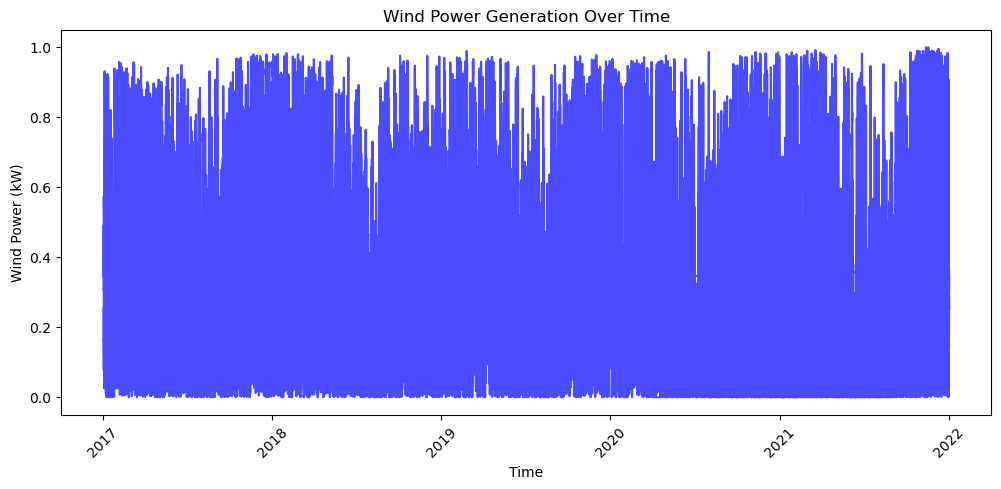

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["Time"], df["Power"], color="blue", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Wind Power (kW)")
plt.title("Wind Power Generation Over Time")
plt.xticks(rotation=45)
plt.show()

###  Distribution of Key Features

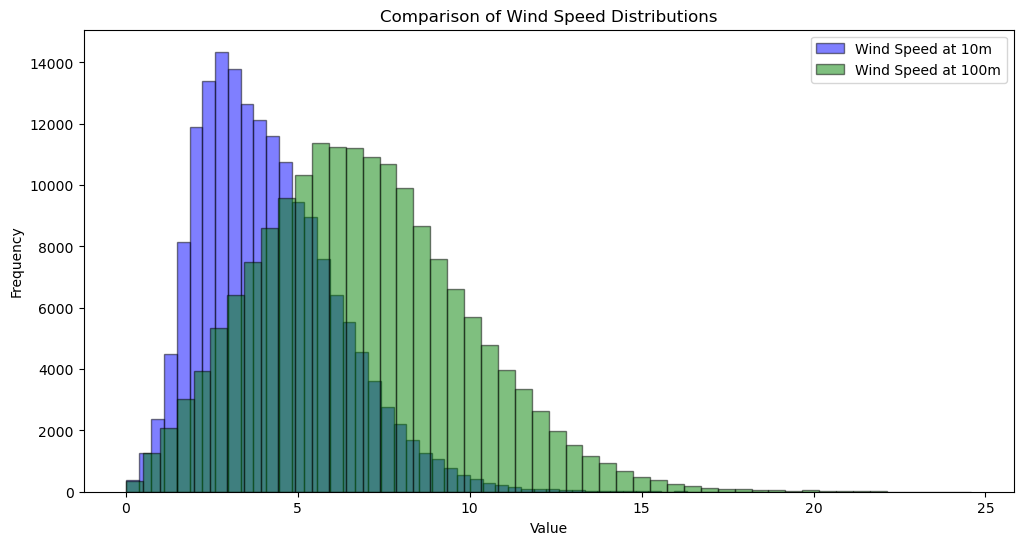

In [20]:
# Plot histograms of windspeed at 10m, 100m
plt.figure(figsize=(12, 6))

plt.hist(df["windspeed_10m"], bins=50, alpha=0.5, color="blue", edgecolor="black", label="Wind Speed at 10m")
plt.hist(df["windspeed_100m"], bins=50, alpha=0.5, color="green", edgecolor="black", label="Wind Speed at 100m")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Comparison of Wind Speed Distributions")
plt.legend()
plt.show()

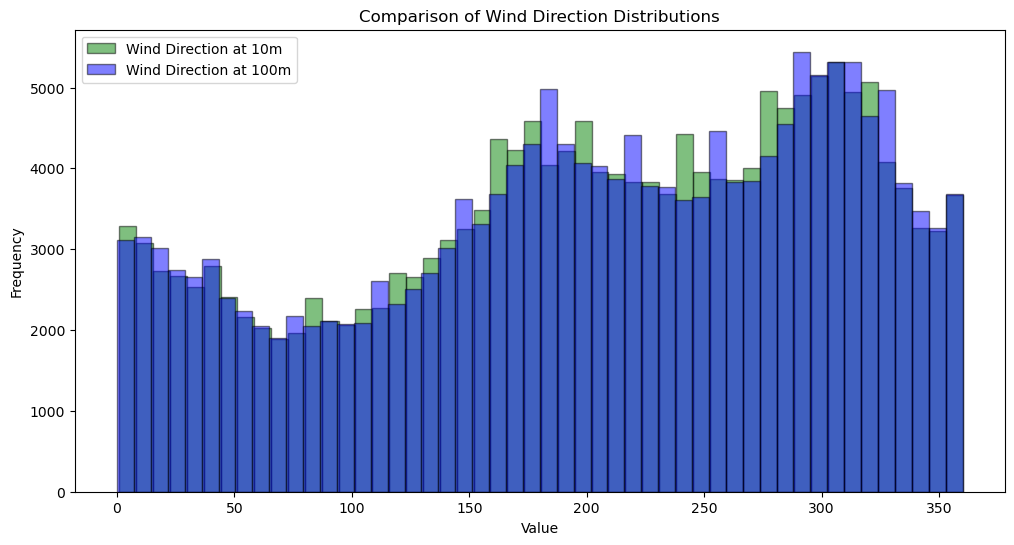

In [21]:
# Plot histograms of wind direction at 10m, 100m
plt.figure(figsize=(12, 6))

plt.hist(df["winddirection_10m"], bins=50, alpha=0.5, color="green", edgecolor="black", label="Wind Direction at 10m")
plt.hist(df["winddirection_100m"], bins=50, alpha=0.5, color="blue", edgecolor="black", label="Wind Direction at 100m")


plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Comparison of Wind Direction Distributions")
plt.legend()
plt.show()

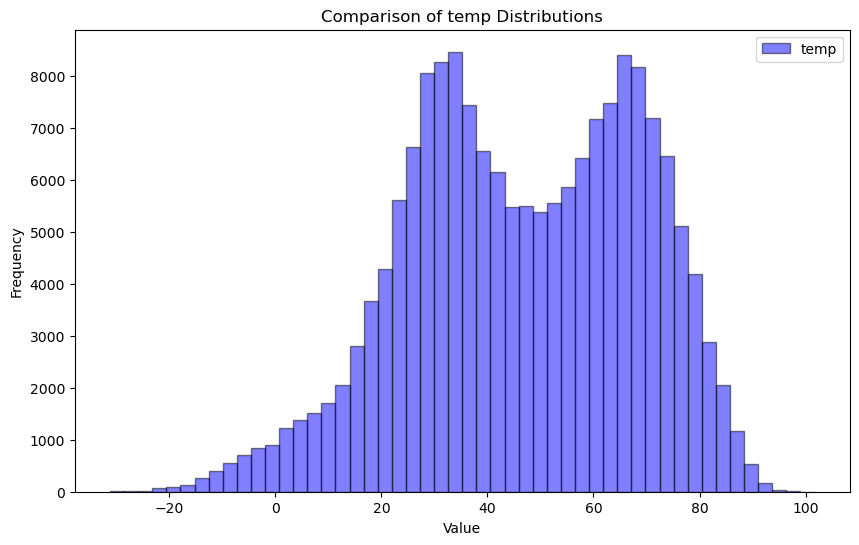

In [22]:
# Plot histograms of 
plt.figure(figsize=(10, 6))

plt.hist(df["temperature_2m"], bins=50, alpha=0.5, color="blue", edgecolor="black", label="temp")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Comparison of temp Distributions")
plt.legend()
plt.show()

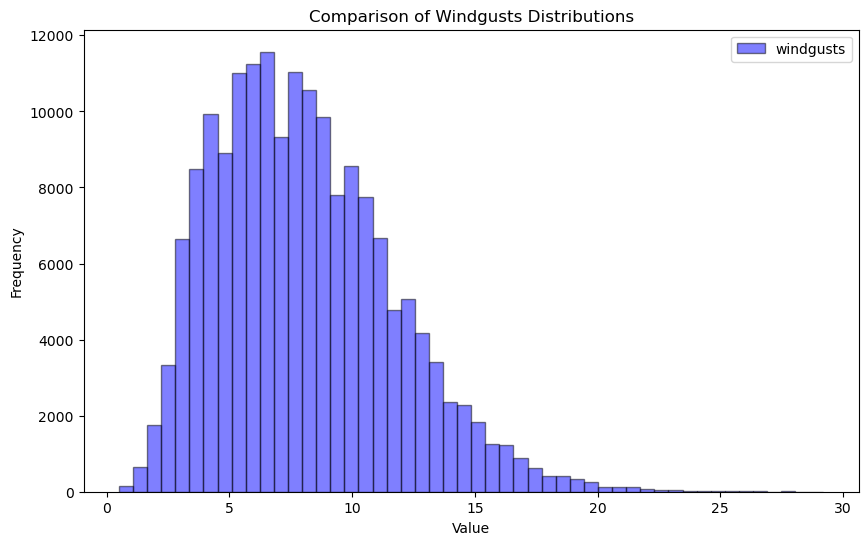

In [23]:

# Plot histograms of 
plt.figure(figsize=(10, 6))

plt.hist(df["windgusts_10m"], bins=50, alpha=0.5, color="blue", edgecolor="black", label="windgusts")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Comparison of Windgusts Distributions")
plt.legend()
plt.show()

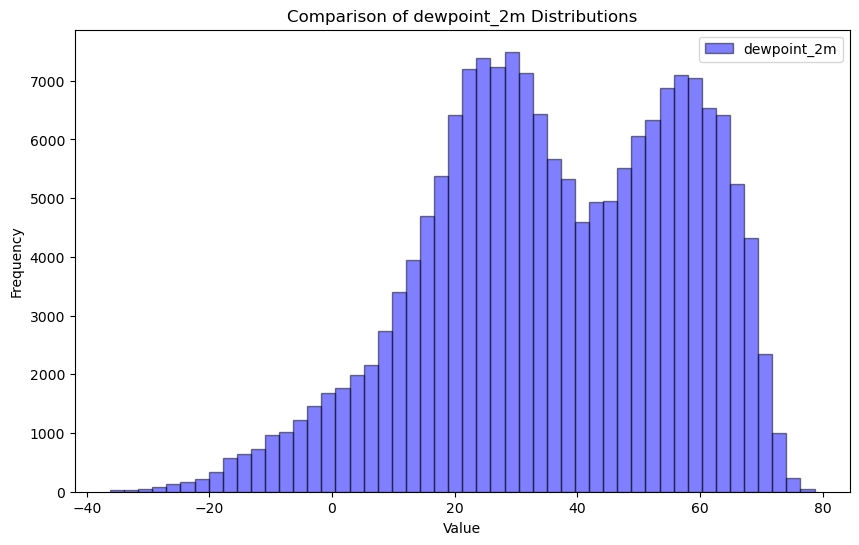

In [24]:


# Plot histograms of 
plt.figure(figsize=(10, 6))

plt.hist(df["dewpoint_2m"], bins=50, alpha=0.5, color="blue", edgecolor="black", label="dewpoint_2m")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Comparison of dewpoint_2m Distributions")
plt.legend()
plt.show()

### Correlation Analysis


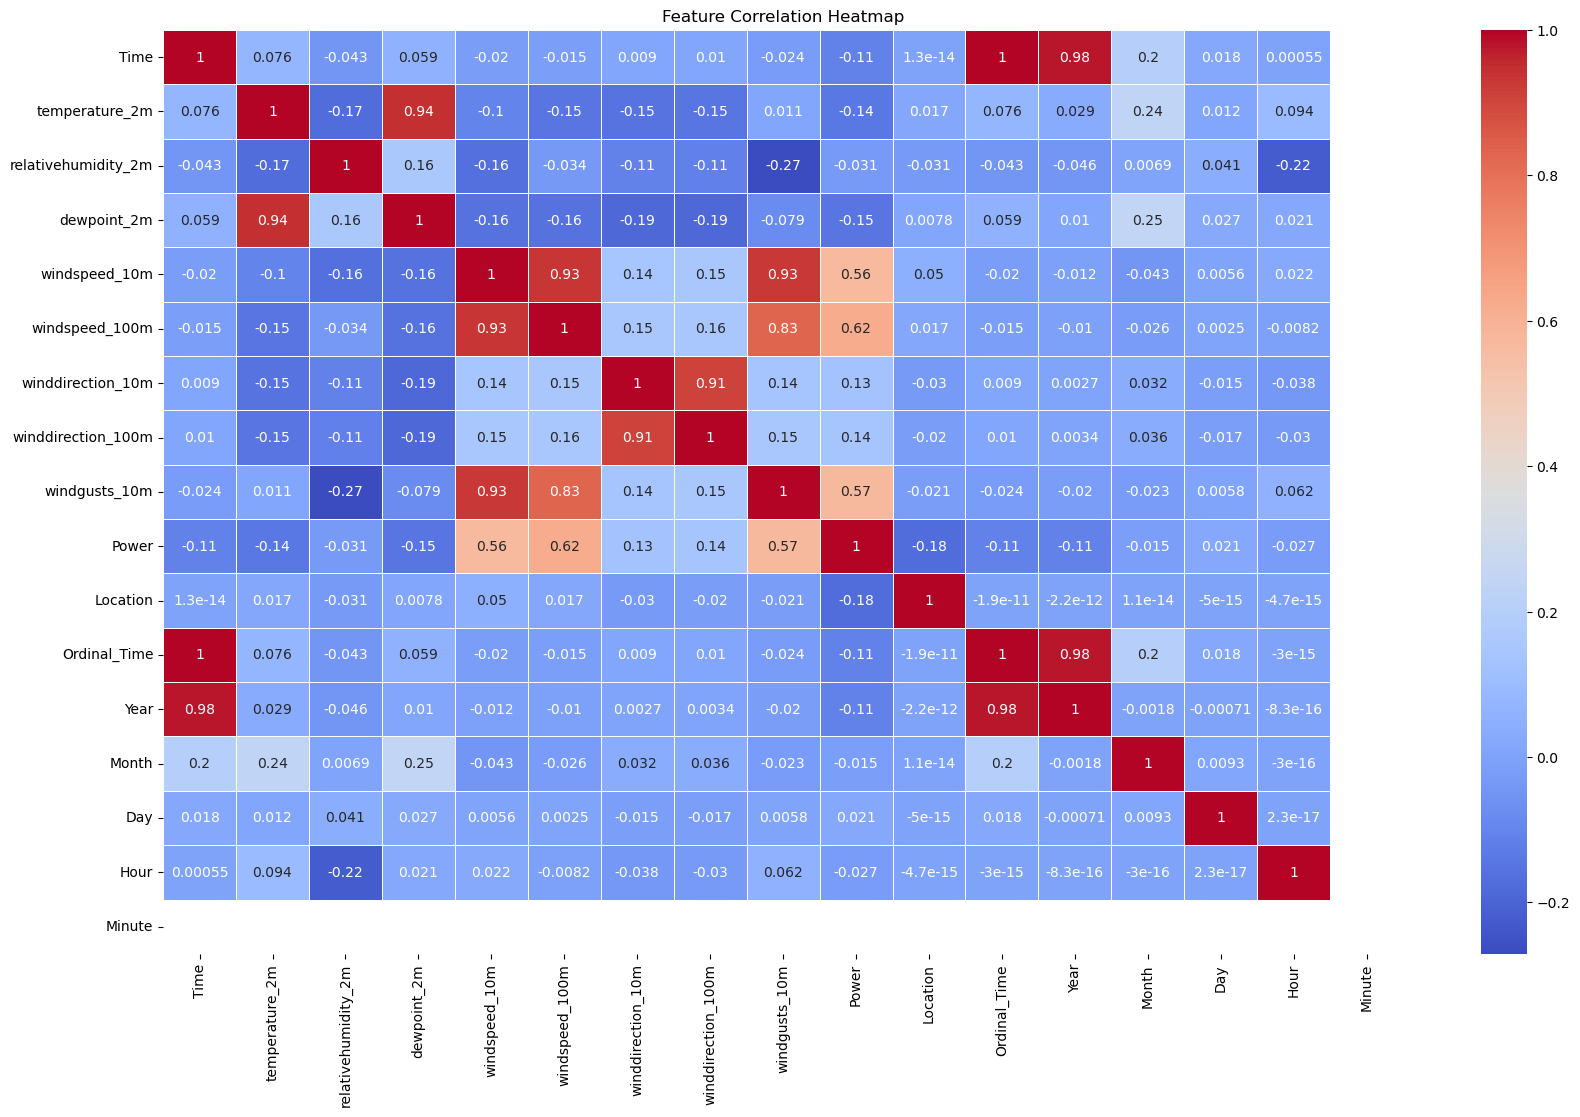

In [25]:
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

###  Wind Power vs

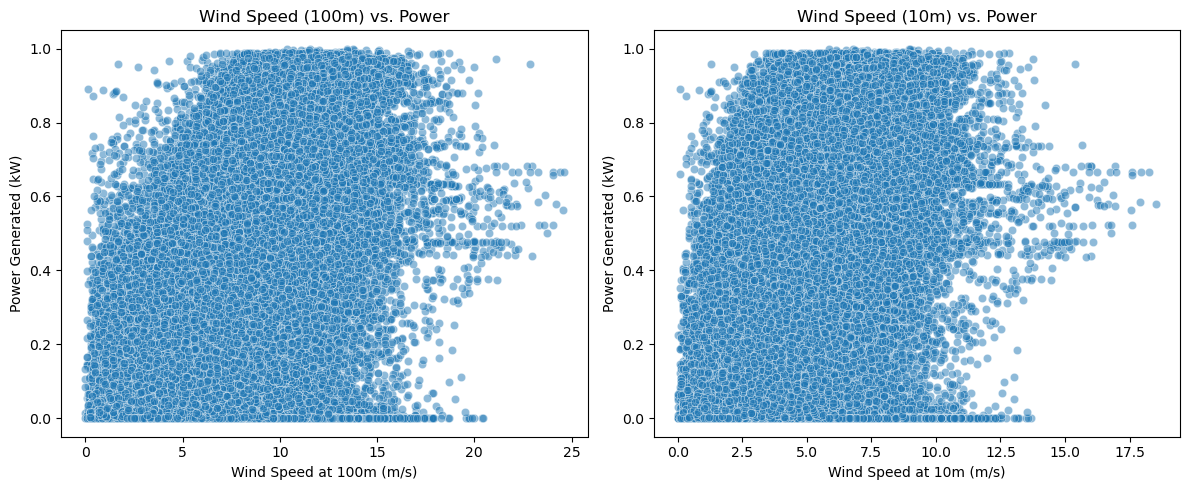

In [26]:
# Create a single figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for Wind Speed at 100m vs. Power
sns.scatterplot(x=df["windspeed_100m"], y=df["Power"], alpha=0.5, ax=axes[0])
axes[0].set_xlabel("Wind Speed at 100m (m/s)")
axes[0].set_ylabel("Power Generated (kW)")
axes[0].set_title("Wind Speed (100m) vs. Power")

# Scatter plot for Wind Speed at 10m vs. Power
sns.scatterplot(x=df["windspeed_10m"], y=df["Power"], alpha=0.5, ax=axes[1])
axes[1].set_xlabel("Wind Speed at 10m (m/s)")
axes[1].set_ylabel("Power Generated (kW)")
axes[1].set_title("Wind Speed (10m) vs. Power")

plt.tight_layout()
plt.show()


In [27]:
# plt.figure(figsize=(10, 5))
# sns.scatterplot(x=df["temperature_2m"], y=df["Power"], alpha=0.5)
# plt.xlabel("Windgusts at 100m (m/s)")
# plt.ylabel("Power Generated (kW)")
# plt.title("Wind guts vs. Power Output")
# plt.show()

### Seasonal Trends in Wind Power

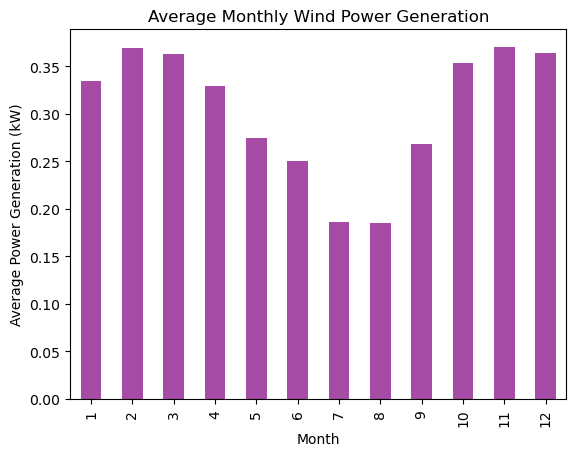

In [28]:
df.groupby("Month")["Power"].mean().plot(kind="bar", color="purple", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Power Generation (kW)")
plt.title("Average Monthly Wind Power Generation")
plt.show()


C:\Users\abhis\AppData\Local\Temp\ipykernel_31012\897559068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Location"], y=df["Power"], palette="coolwarm")


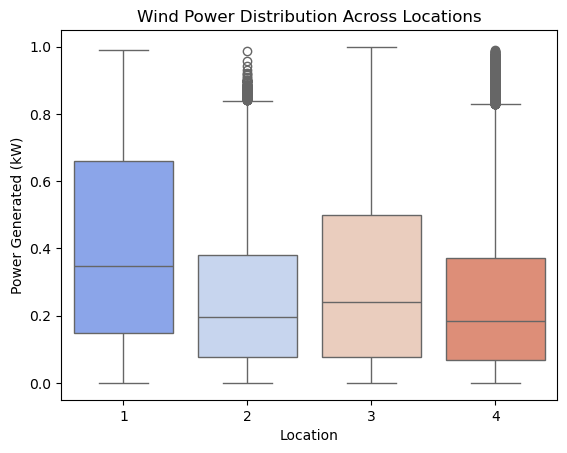

In [29]:
sns.boxplot(x=df["Location"], y=df["Power"], palette="coolwarm")
plt.xlabel("Location")
plt.ylabel("Power Generated (kW)")
plt.title("Wind Power Distribution Across Locations")
plt.show()

##  Apply Normalization & Drop

In [30]:
# Let's remove time col
df.drop('Time', axis=1, inplace=True)

In [34]:
# Columns to Standardize (Z-score Normalization)
standardize_cols = ["temperature_2m", "dewpoint_2m", "relativehumidity_2m"]

# Columns to Min-Max Scale
minmax_cols = ["windspeed_10m", "windspeed_100m", "winddirection_10m", "winddirection_100m", "windgusts_10m"]

# Apply Standardization
scaler_standard = StandardScaler()
df[standardize_cols] = scaler_standard.fit_transform(df[standardize_cols])

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
df[minmax_cols] = scaler_minmax.fit_transform(df[minmax_cols])

# Save the normalized dataset
df.to_csv(data_dir+"/Wind_Power_Normalized.csv", index=False)

## Splitting data.

In [6]:
path_csv_cleaned = os.path.join(data_dir,'Wind_Power_Normalized.csv')
df_cleaned = pd.read_csv(path_csv_cleaned)

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  float64
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  float64
 6   winddirection_100m   175200 non-null  float64
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location             175200 non-null  int64  
 10  Ordinal_Time         175200 non-null  int64  
 11  Year                 175200 non-null  int64  
 12  Month                175200 non-null  int64  
 13  Day                  175200 non-null  int64  
 14  Hour                 175200 non-null  int64  
 15  Minute           

In [9]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=["Power"])  # Remove target column
y = df_cleaned["Power"]                 # Target variable

In [10]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## XGBoost (Gradient Boosting for Time Series)

In [31]:
# Define the optimized XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=500,           # Increase estimators for better learning
    learning_rate=0.05,         # Lower learning rate for stability
    max_depth=6,                # Slightly deeper trees for more complexity
    subsample=0.9,              # Use 90% of data in each boosting round
    colsample_bytree=0.9,       # Use 90% of features in each boosting round
    min_child_weight=3,         # Helps prevent overfitting (min samples required for split)
    gamma=0.2,                  # Controls loss reduction, prevents overfitting
    reg_alpha=0.5,              # L1 regularization (helps sparsity)
    reg_lambda=0.8,             # L2 regularization (helps generalization)
    objective="reg:squarederror",  # Explicit objective for regression
    eval_metric="rmse",         # Root Mean Squared Error (better than MSE)
    early_stopping_rounds=20,   # Stops training if validation RMSE doesn't improve for 20 rounds
    random_state=42
)

In [33]:
# Fit the model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],   # Use test set for early stopping
    verbose=True
)

[0]	validation_0-rmse:0.25044
[1]	validation_0-rmse:0.24297
[2]	validation_0-rmse:0.23595
[3]	validation_0-rmse:0.22993
[4]	validation_0-rmse:0.22411
[5]	validation_0-rmse:0.21836
[6]	validation_0-rmse:0.21350
[7]	validation_0-rmse:0.20896
[8]	validation_0-rmse:0.20429
[9]	validation_0-rmse:0.20000
[10]	validation_0-rmse:0.19597
[11]	validation_0-rmse:0.19303
[12]	validation_0-rmse:0.18945
[13]	validation_0-rmse:0.18622
[14]	validation_0-rmse:0.18321
[15]	validation_0-rmse:0.18027
[16]	validation_0-rmse:0.17753
[17]	validation_0-rmse:0.17517
[18]	validation_0-rmse:0.17295
[19]	validation_0-rmse:0.17081
[20]	validation_0-rmse:0.16896
[21]	validation_0-rmse:0.16760
[22]	validation_0-rmse:0.16580
[23]	validation_0-rmse:0.16419
[24]	validation_0-rmse:0.16266
[25]	validation_0-rmse:0.16135
[26]	validation_0-rmse:0.16013
[27]	validation_0-rmse:0.15901
[28]	validation_0-rmse:0.15798
[29]	validation_0-rmse:0.15698
[30]	validation_0-rmse:0.15617
[31]	validation_0-rmse:0.15533
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
# Predictions
y_pred = xgb_model.predict(X_test)

### Mean Absolute Error (MAE) Accuracy

In [35]:
mae = np.mean(np.abs(y_test - y_pred))
mae_accuracy = 100 - (mae / np.mean(y_test)) * 100  # Ensures accuracy is in 0-100%

print(f"✅ MAE-Based Accuracy: {mae_accuracy:.2f}%")

✅ MAE-Based Accuracy: 66.75%


## R² Score as Accuracy

In [36]:
r2 = r2_score(y_test, y_pred)
r2_accuracy = r2 * 100  # Convert to percentage

print(f"✅ R² Score Accuracy: {r2_accuracy:.2f}%")

✅ R² Score Accuracy: 72.51%


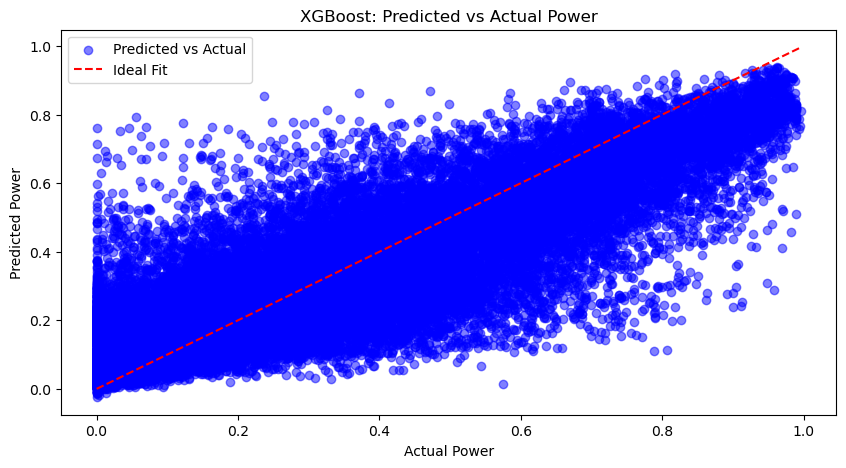

In [37]:
# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Ideal Fit")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("XGBoost: Predicted vs Actual Power")
plt.legend()
plt.show()

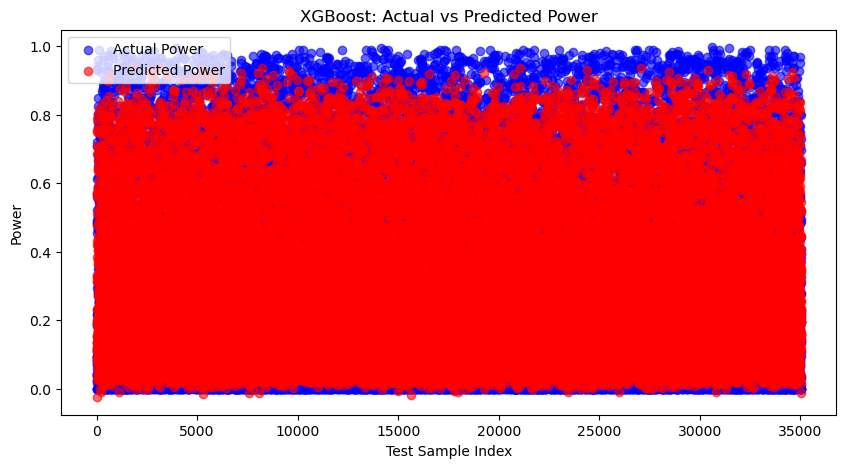

In [38]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))

# Plot y_test (actual values)
plt.scatter(range(len(y_test)), y_test, color="blue", alpha=0.6, label="Actual Power")

# Plot y_pred (predicted values)
plt.scatter(range(len(y_pred)), y_pred, color="red", alpha=0.6, label="Predicted Power")

plt.xlabel("Test Sample Index")
plt.ylabel("Power")
plt.title("XGBoost: Actual vs Predicted Power")
plt.legend()
plt.show()